**1.**PROBLME STATEMENT
##**The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.**

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

# 2. Hypothesis Generation

1. Product content
2. Store location, size and age
3. Seasonal sale?
4. Discount on products
5. Marketing strategy
6. Non-availability of products
7. Behaviour of employees
8. Opening hours
9. Products visibility
10. Arrangements of products
11. Product price

In [1]:
!unzip "/content/9961_14084_bundle_archive.zip"

Archive:  /content/9961_14084_bundle_archive.zip
  inflating: Test.csv                
  inflating: Train.csv               


In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.impute import KNNImputer
import datetime as dt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


from sklearn.metrics import mean_squared_error, r2_score

import pickle

**Dataset**

In [3]:
df = pd.read_csv("/content/Train.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.shape

(8523, 12)

In [56]:
test = pd.read_csv("/content/Test.csv")
test.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [ ]:
test.shape

(5681, 11)

In [ ]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
#checking for duplicat values
df.duplicated().any()

False

In [ ]:
#checking for unique values from each column
df.nunique()

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [ ]:
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [ ]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [ ]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

We can see that 'Low Fat', 'LF', 'low fat' all imply to low_fat content and these two 'reg', 'Regular' implies regular fat content. Let's fix this.

In [5]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['Low Fat', 'LF', 'low fat'], 'low_fat').replace(['reg', 'Regular'], 'regular')

In [ ]:
df['Item_Fat_Content'].value_counts()

low_fat    5517
regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [ ]:
df['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [ ]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [ ]:
df['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

**Exploratory Data Analysis**

Univariate analysis

<Axes: xlabel='count', ylabel='Item_Fat_Content'>

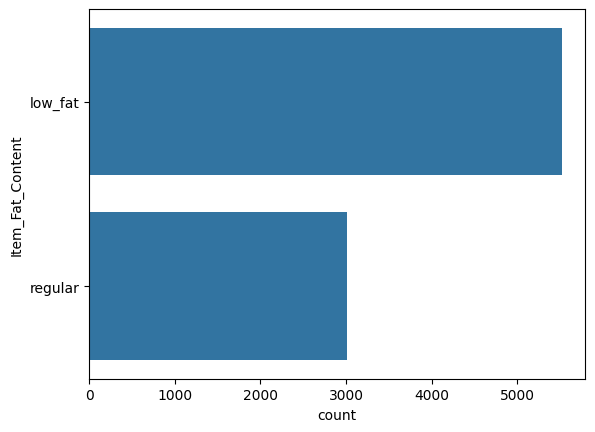

In [ ]:
sns.countplot(df['Item_Fat_Content'])

<Axes: xlabel='count', ylabel='Item_Type'>

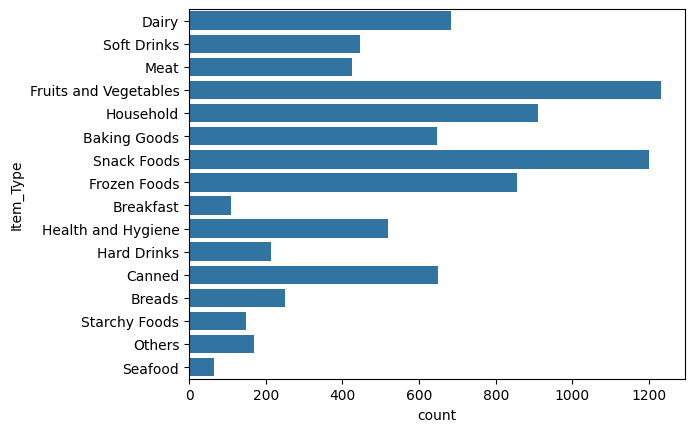

In [ ]:
sns.countplot(df['Item_Type'])

<Axes: xlabel='count', ylabel='Outlet_Identifier'>

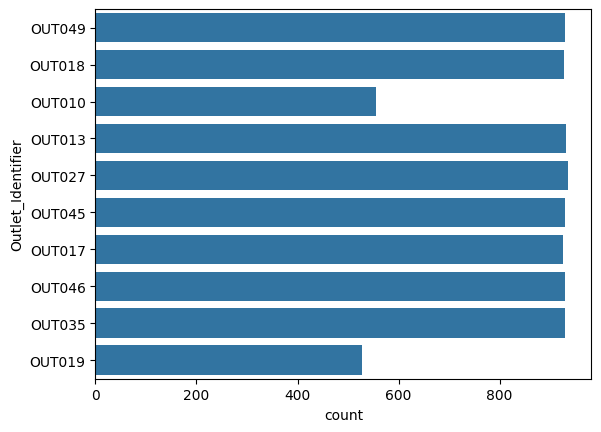

In [ ]:
sns.countplot(df['Outlet_Identifier'])

<Axes: xlabel='count', ylabel='Outlet_Size'>

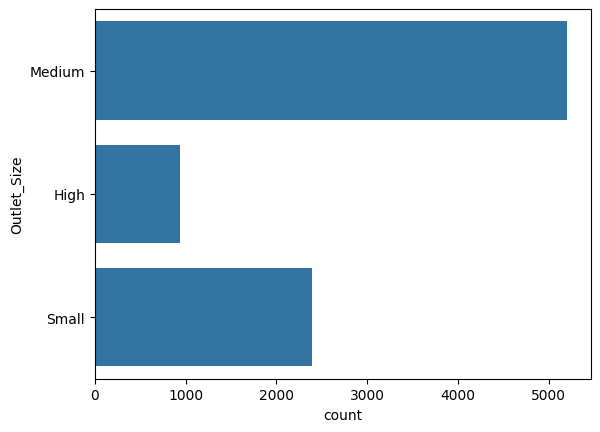

In [ ]:
sns.countplot(df['Outlet_Size'])

<Axes: xlabel='count', ylabel='Outlet_Location_Type'>

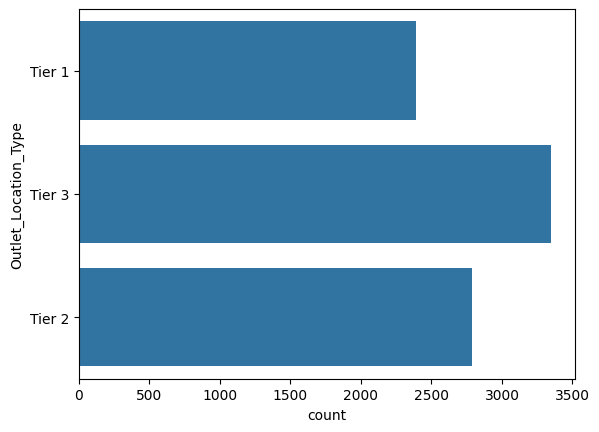

In [ ]:
sns.countplot(df['Outlet_Location_Type'])

<Axes: xlabel='count', ylabel='Outlet_Type'>

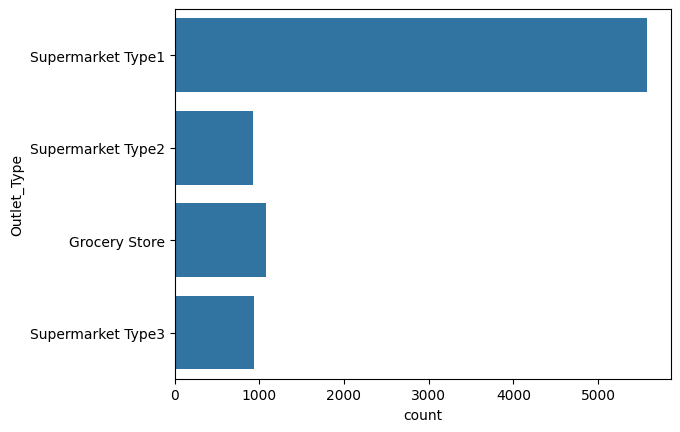

In [ ]:
sns.countplot(df['Outlet_Type'])

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

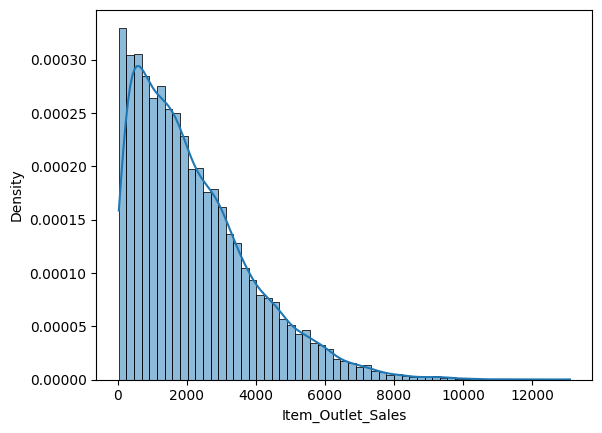

In [ ]:
sns.histplot(df['Item_Outlet_Sales'],stat ='density',kde = True)

So, Item_outliet_sale is a positively skewed distribution.

In [6]:
catogorical = df.select_dtypes(include=[np.object])
numeric = df.select_dtypes(include=[np.number])

<ipython-input-6-edc5c04d4aa4>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  catogorical = df.select_dtypes(include=[np.object])


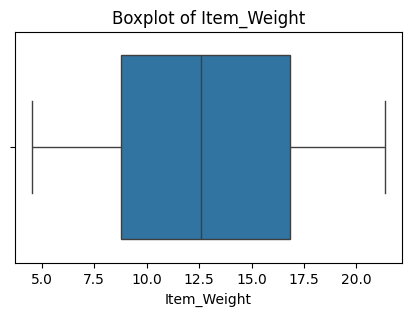

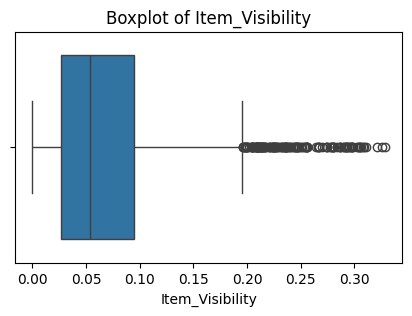

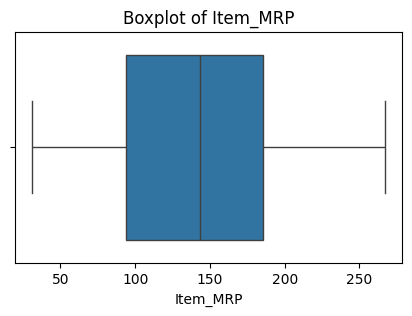

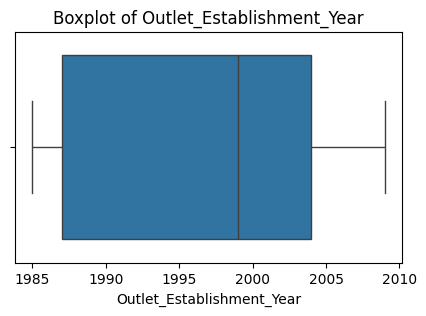

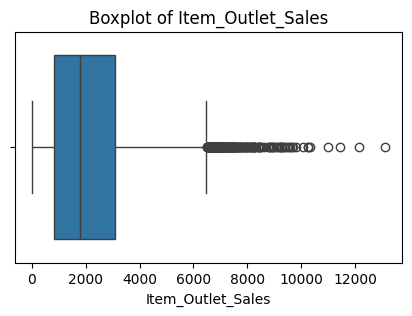

In [10]:
for col in (numeric.columns):
  plt.figure(figsize=(5,3))
  sns.boxplot(x=numeric[col])
  plt.title(f'Boxplot of {col}')

From the above plots, we can clearly say that Item_Outlet_Sales and Item_Visibility column contains outliers.

Bivariate analysis

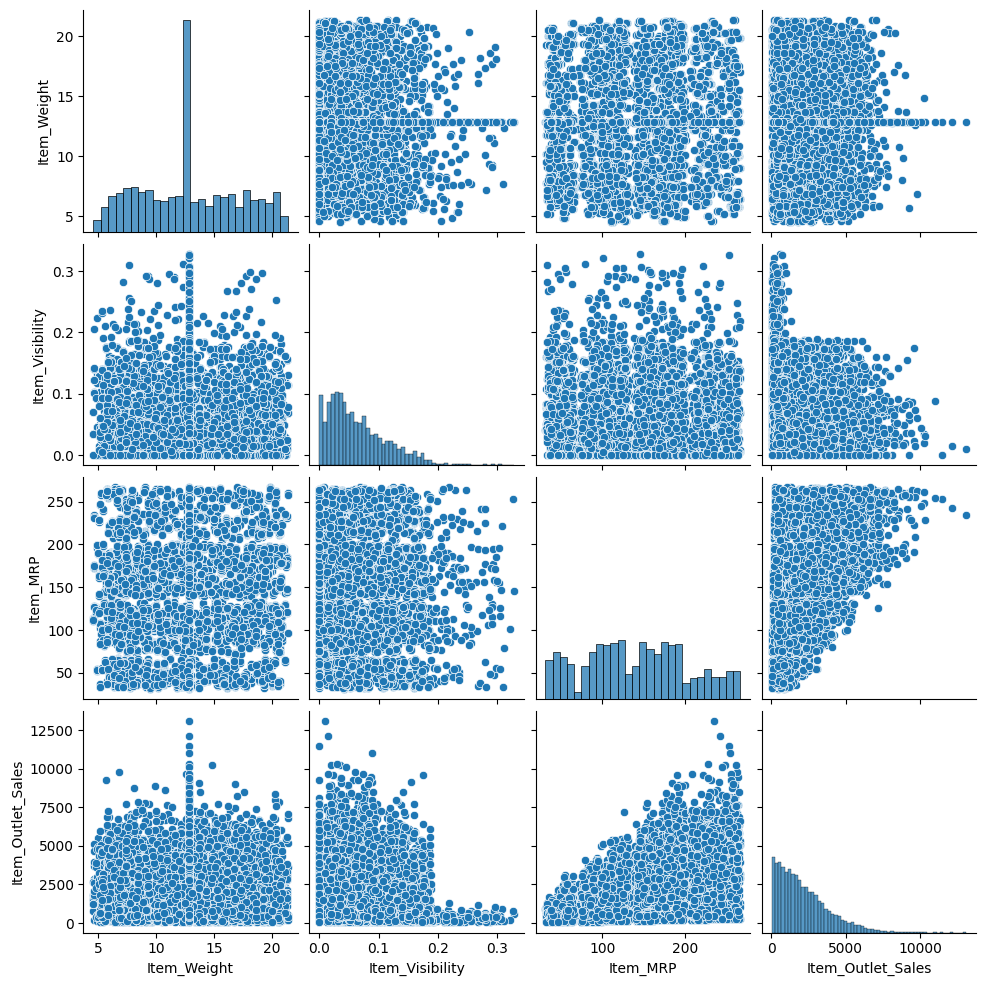

In [ ]:
sns.pairplot(df[['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']])

#**Handling missing values**

In [ ]:
df.isnull().sum()

Item_Identifier                0
Item_Fat_Content               0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
Item_Weight_interploate        0
Item_Visibility_interpolate    0
Outlet_age                     0
dtype: int64

In [7]:
df['Item_Weight_mean'] = df['Item_Weight'].fillna(np.mean(df['Item_Weight']))

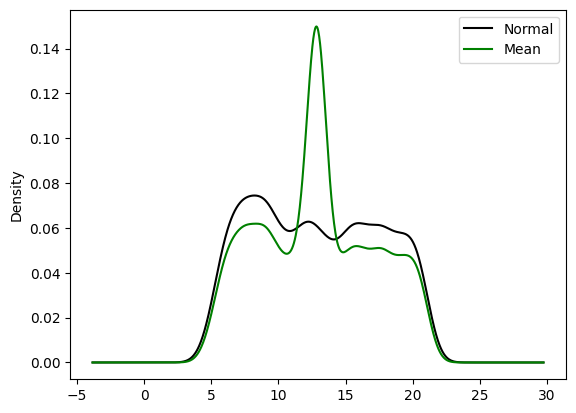

In [ ]:
df['Item_Weight'].plot(kind='kde',label='Normal', linewidth=1.5, color='black')
df['Item_Weight_mean'].plot(kind='kde',label='Mean',linewidth=1.5, color='green')

plt.legend()

We can see that, it changes the distribution of the column after filling the missing values with mean. so, it wouldn't be a good choice to fill missing values by mean.

Lets try interpolate method.

In [8]:
df['Item_Weight_interploate']=df['Item_Weight'].interpolate(method="linear")

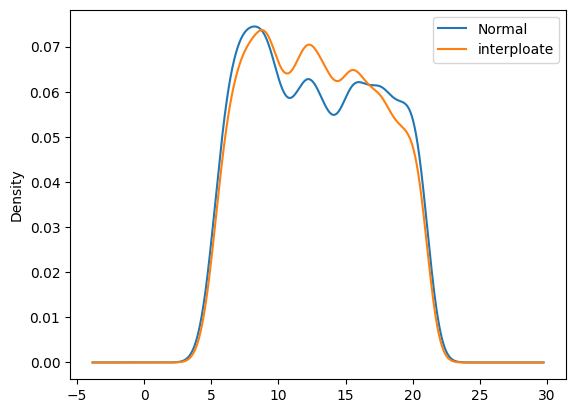

In [ ]:
df['Item_Weight'].plot(kind = "kde",label="Normal")

df['Item_Weight_interploate'].plot(kind = "kde",label = "interploate")

plt.legend()

We can see that this method doesn't affect the distribution of the column much. It could be a good choice to handle the missing values for this column.

Let's try with KNN imputer.

In [9]:
knn = KNNImputer(n_neighbors=5,weights="distance")

In [10]:
df['Item_Weight_knn']= knn.fit_transform(df[['Item_Weight']]).ravel()

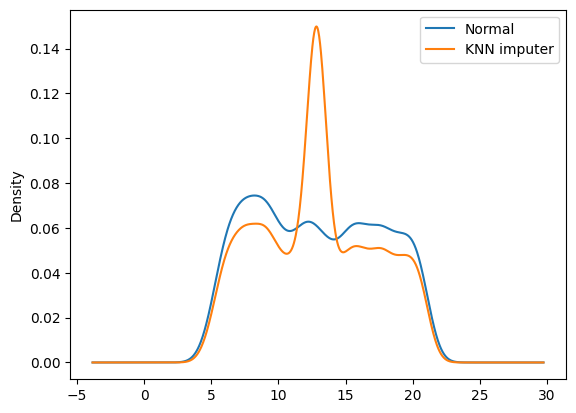

In [ ]:
df['Item_Weight'].plot(kind = "kde",label="Normal")

df['Item_Weight_knn'].plot(kind = "kde",label = "KNN imputer")

plt.legend()

It also affecting the actul distribution of the column.

<Axes: >

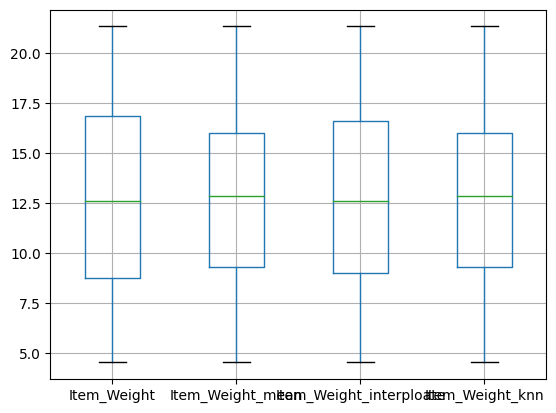

In [ ]:
df[['Item_Weight','Item_Weight_mean','Item_Weight_interploate','Item_Weight_knn']].boxplot()

So, after applying different types of filling method. We can see that Interpolate method is working pretty well. So we'll consider interpolate method for handling missing values in this case.

In [11]:
df = df.drop(['Item_Weight','Item_Weight_mean','Item_Weight_knn'],axis=1)
df.head(2)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate
0,FDA15,low_fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
1,DRC01,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92


In [ ]:
df.isnull().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_interploate         0
dtype: int64

In [12]:
mode_size = df.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))

In [18]:
mode_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [13]:
missing_values = df['Outlet_Size'].isnull()

In [14]:
df.loc[missing_values,'Outlet_Size'] = df.loc[missing_values,'Outlet_Type'].apply(lambda x :mode_size[x])

In [ ]:
df.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Weight_interploate      0
dtype: int64

In [ ]:
df['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

Here, we can see that 'Item_Visibility' is present as 0, Which simply means item is not displayed at all. Which doesn't make much sense. So we can fix it by using interpolate method.

In [15]:
df['Item_Visibility_interpolate'] = df['Item_Visibility'].replace(0,np.nan).interpolate(method='linear')

In [ ]:
df['Item_Visibility_interpolate'].value_counts()

0.076975    3
0.044024    2
0.040912    2
0.076856    2
0.078759    2
           ..
0.021011    1
0.099189    1
0.076866    1
0.014116    1
0.044878    1
Name: Item_Visibility_interpolate, Length: 8405, dtype: int64

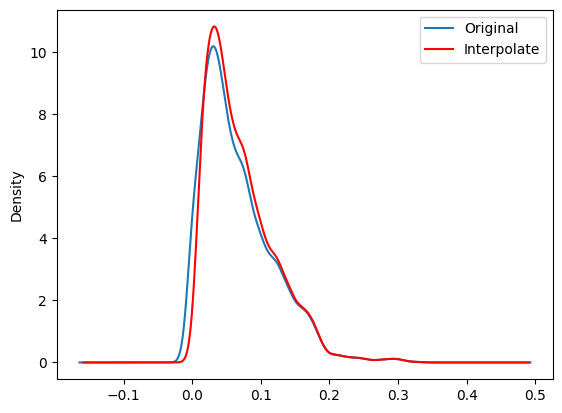

In [ ]:
df['Item_Visibility'].plot(kind="kde",label="Original")

df['Item_Visibility_interpolate'].plot(kind="kde",color='red',label="Interpolate")

plt.legend()

The graph above clearly shows that the interpolate method effectively replaces the 0 values.

In [16]:
#dropping the old column
df = df.drop('Item_Visibility',axis=1)

In [ ]:
df.head(1)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate,Item_Visibility_interpolate
0,FDA15,low_fat,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,0.016047


In the dataset, it is evident that the 'Item_Identifier' column contains values that starts with FD, NC, and DR, succeeded by alphanumeric characters. Notably, these initial two letters in the 'Item_Identifier' signify Foods, Non-consumable products, and Drinks, respectively. As a result, we can simplify the identification process by categorizing products based on the FD, NC, and DR prefixes, rather than dealing with 1559 individual categories.

In [17]:
df['Item_Identifier'] =df['Item_Identifier'].apply(lambda x : x[:2])

In [ ]:
df['Item_Identifier'].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Identifier, dtype: int64

The "Year" alone doesn't provide significant utility. However, if it indicates the age of the outlet, specifying how many years the outlet has been in operation would offer more meaningful information.

In [18]:
current_year = dt.datetime.today().year

In [19]:
df['Outlet_age']= current_year - df['Outlet_Establishment_Year']

In [20]:
df = df.drop('Outlet_Establishment_Year',axis =1)

In [30]:
df.head(2)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate,Item_Visibility_interpolate,Outlet_age
0,FD,low_fat,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047,25
1,DR,regular,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278,15


# **Encoding**


In [107]:
encoded_df = df.copy()

category = df.select_dtypes(include=['object']).columns

for col in category:
    oe = OrdinalEncoder()
    encoded_df[col]=oe.fit_transform(encoded_df[[col]])
    print(oe.categories_)

[array(['DR', 'FD', 'NC'], dtype=object)]
[array(['low_fat', 'regular'], dtype=object)]
[array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)]
[array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)]
[array(['High', 'Medium', 'Small'], dtype=object)]
[array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)]
[array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)]


In [ ]:
encoded_df.head(3)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate,Item_Visibility_interpolate,Outlet_age
0,1.0,0.0,4.0,249.8092,9.0,1.0,0.0,1.0,3735.1380,9.30,0.016047,25
1,0.0,1.0,14.0,48.2692,3.0,1.0,2.0,2.0,443.4228,5.92,0.019278,15
2,1.0,0.0,10.0,141.6180,9.0,1.0,0.0,1.0,2097.2700,17.50,0.016760,25


In [ ]:
encoded_df.shape

(8523, 12)

as Item_Visibility_interpolate are having outliers. let's apply Robus scaling and normalization to other columns.

In [108]:
x=encoded_df.drop('Item_Outlet_Sales',axis =1)
y=encoded_df.iloc[:,-1]

Scalling

In [67]:
rb_scaler = RobustScaler()
st_scaler = StandardScaler()

encoded_df['Item_Visibility_interpolate'] = rb_scaler.fit_transform(encoded_df[['Item_Visibility_interpolate']])

cols = [col for col in x.columns if col != 'Item_Visibility_interpolate']
x[cols] = st_scaler.fit_transform(x[cols])

In [69]:
x.sample(2)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_interploate,Item_Visibility_interpolate,Outlet_age
5903,-0.179795,-0.738147,-0.528935,-0.317731,0.450371,0.799954,-0.138882,-0.252658,1.320365,0.104658,-0.736822
1199,1.735696,-0.738147,0.183698,-1.638710,0.802852,0.799954,-0.138882,-0.252658,-0.411991,0.037972,-0.497909


# **Seperating training and testing data**

In [109]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

# **Fitting linear regression model**

In [110]:
MLR = LinearRegression()
MLR.fit(x_train,y_train)

LinearRegression()

In [111]:
y_pred = MLR.predict(x_test)

In [112]:
y_pred

array([37., 27., 25., ..., 37., 15., 22.])

In [113]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 2.7833437153290177e-27
Mean Absolute Error: 4.4321405457434634e-14
R-squared: 1.0


In [114]:
def adjusted_r2_score(y_true, y_pred, num_features):
    n = y_true.shape[0]
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - (((1 - r2) * (n - 1)) / (n - num_features - 1))
    return adjusted_r2

adjr = adjusted_r2_score(y_test, y_pred,4)
print(f"adjusted r score: {adjr}")

adjusted r score: 1.0


**Applying Regularization Technique**

# **L1/ Lasso regularization**

In [142]:
lasso_model = Lasso(alpha=0.3)

In [143]:
lasso_model.fit(x_train, y_train)
y_pred = lasso_model.predict(x_test)

In [136]:
y_pred

array([36.92297628, 26.9939211 , 25.00811006, ..., 36.92297628,
       15.07905488, 22.02939351])

In [144]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.0012409092032214576
R-squared: 0.9999818764691946


# **Random Forest model fitting**

In [124]:
r_forest = RandomForestRegressor(n_estimators=100,max_depth=15, min_samples_split=2, min_samples_leaf=1, random_state=42)
r_forest.fit(x_train, y_train)
y_pred = r_forest.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.0
R-squared: 1.0


In [100]:
feature_importances = r_forest.feature_importances_
feature_importances

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.66125959e-02, 1.84223348e-03, 6.50862199e-04, 1.19027340e-04,
       0.00000000e+00, 0.00000000e+00, 9.80775281e-01])

In [120]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(r_forest, x, y, cv=5)
scores

array([1., 1., 1., 1., 1.])

Random Forest is overfitting.

# **XGBoost fitting**

In [121]:
xgb = XGBRegressor()

In [122]:
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

In [123]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.9904971668971947e-10
R-squared: 0.9999999999970929


# **Hyperparameter tunning using grid search for XGBoost**

In [126]:
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, make_scorer

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

scorer = make_scorer(mean_squared_error, greater_is_better=False)

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring=scorer,
    cv=5,
    verbose=1
)

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 1.0}
Mean Squared Error on Test Set: 2.1355895767987998e-10


In [128]:
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.9999999999968809


From all of the trained model, we can see that every model is performming quite well.

# **Preprocessing on test data**

In [85]:
test=pd.read_csv("/content/Test.csv")

In [86]:
test.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [87]:
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace(['Low Fat', 'LF', 'low fat'], 'low_fat').replace(['reg', 'Regular'], 'regular')

test['Item_Weight_interploate']=test['Item_Weight'].interpolate(method="linear")


mode_size = test.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))
missing_values = test['Outlet_Size'].isnull()
test.loc[missing_values,'Outlet_Size'] = test.loc[missing_values,'Outlet_Type'].apply(lambda x :mode_size[x])

test['Item_Visibility_interpolate'] = test['Item_Visibility'].replace(0,np.nan).interpolate(method='linear')
test['Item_Identifier'] =test['Item_Identifier'].apply(lambda x : x[:2])

current_year = dt.datetime.today().year
test['Outlet_age']= current_year - test['Outlet_Establishment_Year']
test = test.drop('Outlet_Establishment_Year',axis =1)

test.drop(['Item_Weight','Item_Visibility'],axis=1,inplace=True)


encoded_test = test.copy()

category = test.select_dtypes(include=['object']).columns

for col in category:
    oe = OrdinalEncoder()
    encoded_test[col]=oe.fit_transform(encoded_test[[col]])

rb_scaler = RobustScaler()
st_scaler = StandardScaler()

encoded_test['Item_Visibility_interpolate'] = rb_scaler.fit_transform(encoded_test[['Item_Visibility_interpolate']])

cols = [x for x in encoded_test.columns if x!= 'Item_Visibility_interpolate']
encoded_test[cols] = st_scaler.fit_transform(encoded_test[cols])


In [88]:
encoded_test.sample()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_interploate,Item_Visibility_interpolate,Outlet_age
1979,-0.191873,1.349873,-1.714612,-0.655056,0.097725,-0.664166,1.09156,2.257683,0.126766,0.032873,1.532446


# **Prediction on test data, using Lasso regression model**

In [89]:
y_pred = lasso_model.predict(encoded_test)

In [90]:
y_pred

array([25.02429772, 17.21457788, 26.0005127 , ..., 22.09565278,
       17.21457788, 22.09565278])

# **Saving model**

In [147]:
with open('lasso_model.pkl', 'wb') as file:
    pickle.dump(lasso_model, file)

print("Model saved as lasso_model.pkl")

Model saved as lasso_model.pkl
